In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Game theory

In game theory, a game is defined as

- a set of players
- a set of strategies for each player
- a payoff function for each player
- a specification of what each player knows
- a specification of what each player believes about what other players know
- a specification of what each player believes about what other players believe about what other players know

Consider the following 2x2 game with players A and B written in normal form: 

| | B1 | B2 |
| --- | --- | --- |
| A1 | 1,1 | 0,0 |
| A2 | 0,0 | 2,2 |



## 1 Strategy Spaces

For a player, a strategy space is the set of all possible strategies that player can choose from. In the above game, each player has two strategies, so the strategy space for each player is $\{A1, A2\}$ and $\{B1, B2\}$ respectively.

In [2]:

playerA_strategies = ["A1", "A2"]
playerB_strategies = ["B1", "B2"]

## 2 Player class

The above description is the basis for the Player class below. An instance of Player, a player, has the following attributes:

- name: the name of the player
- strategy_space: the strategy space of the player

A player has the following methods:

- play: choose a strategy from his/her strategy space

In [3]:
class Player:
    def __init__(self, name, strategies):
        self.name = name
        self.strategies = strategies
        self.played_strategy = None
    def play(self, strategy):
        self.played_strategy = strategy
        return strategy

playerA = Player("A", playerA_strategies)
playerB = Player("B", playerB_strategies)

In [4]:
# strategy profile
playerA.played_strategy, playerB.played_strategy

(None, None)

In [5]:
playerA.play("A1")
playerB.play("B2")

# strategy profile
playerA.played_strategy, playerB.played_strategy

'A1'

'B2'

('A1', 'B2')

> A player's `played_strategy` attribute is changed by the `play` method under the hood.

## 2 Payoff Function

A payoff function is a function that maps a `strategy profile` to a `set of each player's payoff`. 
* A strategy profile is a tuple of strategies, one for each player.  
* A payoff is a number that represents the utility of a player.

In the above game, the payoff function can be defined as follows:

In [6]:
payoffMatrix = {
    ('A1', 'B1'): (1, 1), 
    ('A1', 'B2'): (0, 0), 
    ('A2', 'B1'): (0, 0), 
    ('A2', 'B2'): (2, 2)
}
def payoff(strategyA, strategyB):
    return payoffMatrix[(strategyA, strategyB)]

payoff('A1', 'B1')

(1, 1)

* `payoffMatrix` is a dictionary that maps a strategy profile (key) to a set of payoffs (value).

## 3 Game class

A game consists of 

- a set of players (Player class)
- a payoff function (payoffMatrix)

And when both players played their strategies, the payoff can be calculated.



In [7]:
payoffMatrix = {
    ('A1', 'B1'): (1, 1), 
    ('A1', 'B2'): (0, 0), 
    ('A2', 'B1'): (0, 0), 
    ('A2', 'B2'): (2, 2)
}
def payoff(strategyA, strategyB):
    # check if strategyA and strategyB are both not None
    if strategyA and strategyB:
        return payoffMatrix[(strategyA, strategyB)]
    else:
        print("Not all players have played yet.")

payoff('A1', 'B1')
payoff(None, 'B1')

(1, 1)

Not all players have played yet.


In [8]:
class Game:
    def __init__(self, playerA, playerB, payoffMatrix):
        self.players = playerA, playerB
        self.payoffMatrix = payoffMatrix
    def payoff(self):
        if self.players[0].played_strategy and self.players[1].played_strategy:
            return self.payoffMatrix[(self.players[0].played_strategy, self.players[1].played_strategy)]
        else:
            print("Not all players have played yet.")


* An instance of Game requires instances of Player class. We say that a Game class is a composition of Player class.  
* `payoff` method only needs `self` to obtain the played strategies of both players.

In [9]:
playerA = Player("A", ["A1", "A2"])
playerB = Player("B", ["B1", "B2"])
game = Game(playerA, playerB, 
            {
                ('A1', 'B1'): (1, 1), 
                ('A1', 'B2'): (0, 0), 
                ('A2', 'B1'): (0, 0), 
                ('A2', 'B2'): (2, 2)
            }
            )

In [10]:
playerA.play("A1")
game.players[0].played_strategy, game.players[1].played_strategy

playerB.play("B2")
game.players[0].played_strategy, game.players[1].played_strategy

'A1'

('A1', None)

'B2'

('A1', 'B2')

In [11]:
game.payoff()

(0, 0)

* When a player instance, say `playerA`, played, it changes not only its own `played_strategy` attribute (i.e. `playerA.played_strategy`) but also the `playerA.played_strategy` attribute of the game instance (i.e. `game.playerA.played_strategy`). This is because an instance is presented by a **mutable** `self` object, when we passed `playerA` to `game` instance, we passed the (memory address) reference of `playerA` to `game` instance. Therefore, when `playerA` changes its `played_strategy` attribute, `game` instance can see the change.

In [12]:
playerA.play("A1"), playerB.play("B1")
game.payoff()


('A1', 'B1')

(1, 1)

In [13]:
# B deviates
playerA.play("A1"), playerB.play("B2")
game.payoff()

('A1', 'B2')

(0, 0)

In [14]:
# A deviates
playerA.play("A2"), playerB.play("B1")
game.payoff()

('A2', 'B1')

(0, 0)

### Mixed strategy

#### How to draw a strategy

In [10]:
import numpy as np

chosen_strategy = np.random.choice(playerA.strategies, p=[0.35, 0.65])
chosen_strategy

'A1'

<Figure size 600x50 with 0 Axes>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

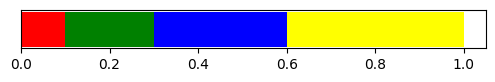

In [15]:

import matplotlib.pyplot as plt

# Segment lengths
lengths = [0.1, 0.2, 0.3, 0.4]

# Colors for each segment
colors = ['red', 'green', 'blue', 'yellow']

# Start of the bar
left = 0

# Create figure with specific height (in this case, 2 inches)
plt.figure(figsize=[6, 0.5])

for idx, length in enumerate(lengths):
    # Add a segment of the bar
    plt.barh(y=1, width=length, left=left, color=colors[idx])
    # Move the starting point of the next segment
    left += length

# Remove y-axis labels
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()


Suppose we assign the probabilities $(0.1, 0.2, 0.3, 0.4)$ to the strategies $(S1, S2, S3, S4)$
 
If a random drawed number is:

- $0 \leq x < 0.1$, then the strategy is $S1$  
- $0.1 \leq x < 0.3$, then the strategy is $S2$
- $0.3 \leq x < 0.6$, then the strategy is $S3$
- $0.6 \leq x < 1$, then the strategy is $S4$

We can construct a cumulative probabilities from probabilities $(0.1, 0.2, 0.3, 0.4)$ as $(0.1, 0.3, 0.6, 1)$ and draw a random number $x$ from $[0, 1)$, then the strategy is the largest $i$ such that $x < cumulative[i]$.

For example,  
- if $x = 0.25$, then the largest $i$ such that $0.25 < cumulative[i]$ is $i = 1$, so the strategy is $S2$.  
- if $x = 0.6$, then the largest $i$ such that $0.6 < cumulative[i]$ is $i = 2$, so the strategy is $S3$.




In [16]:
import numpy as np
cumprob = np.cumsum([0.1, 0.2, 0.3, 0.4]) # cumulative probabilities
cumprob



array([0.1, 0.3, 0.6, 1. ])

In [17]:

# given x = 0.25 choose the first value in cumprob that is larger than x
x = 0.25
cumprob > x
np.argmax(cumprob > x) # index of first True value, i.e. index of the pure strategy to play



array([False,  True,  True,  True])

1

In [18]:
strategies = playerA_strategies
probabilities = [0.4, 0.6]
strategies, probabilities


(['A1', 'A2'], [0.4, 0.6])

In [19]:

import random
x = random.random()
cumprob = np.cumsum(probabilities)
strategies[np.argmax(cumprob > x)]

'A1'

# Game Theory App

We want to turn the above game into a desktop app. The app has the following features:

1. When `game` instance is created, it has a `game-id` attribute.  
2. Players can join the game by entering the `game-id` and the player name they want to use from the player list.

In [20]:
# one way to start a game
playerA = Player("A", ["A1", "A2"])
playerB = Player("B", ["B1", "B2"])
game = Game(playerA, playerB, {
                ('A1', 'B1'): (1, 1), 
                ('A1', 'B2'): (0, 0), 
                ('A2', 'B1'): (0, 0), 
                ('A2', 'B2'): (2, 2)
            }, cloud = True)


TypeError: Game.__init__() got an unexpected keyword argument 'cloud'

- `cloud = True`: the app is deployed on the cloud, so the `gameId` is generated by the app.
- Extra features:  
    - `gameId` attribute: `Game.gameId`  

Two separate players can play the game by entering the `gameId`:

In [ ]:
# player 1 in his/her computer
game = Game(gameId="{gameId}")
player1 = game.players[0]

# player 1 plays
player1.play("A1")

In [ ]:
# player 2 in his/her computer
game = Game(gameId="{gameId}")
player2 = game.players[1]

# player 2 plays
player2.play("B1")

In [ ]:
# both players can check their payoff of the latest round
game.payoff(n=0)

# both players can check their payoff of the second to the last round
game.payoff(n=1)

# both players can check their payoff of every round
game.payoff(n=-1)

In [ ]:
# take out name attribute from each value in game.players
# and put them into a list
[player.name for player in game.players]

['A', 'B']

In [ ]:
playerA = GameApp("game-id", "player name")

In [ ]:
playerA.play("A1")

In [1]:
from py.game.twoByN import *


playerA = Player("A", ["A1", "A2"])
playerB = Player("B", ["B1", "B2"])
game = Game(playerA, playerB, {
                ('A1', 'B1'): (1, 1), 
                ('A1', 'B2'): (0, 0), 
                ('A2', 'B1'): (0, 0), 
                ('A2', 'B2'): (2, 2)
            }, cloud=True)


/Users/martin/Documents/GitHub/112-2-programming-for-economic-modeling/ipynb
File ID: 1pkO_bElj2qS5scpHkTPtavyI4abxTZHl
File ID: 1e85SCJkDJMU2cO-zBWCAyMjwJ5R5vMNR


In [2]:
game.gameId, game.players[0].playerId, game.players[1].playerId

('r0d41faa8', 'p7bb2', 'p66c7')

In [1]:
import py.google.upload as gd

items = gd.list_files("1EdMkDrkSRATLiYMhjnn0Mk2_JFRzsx46")

Files:
r0d41faa8 (1pkO_bElj2qS5scpHkTPtavyI4abxTZHl)
game.json (1CND6IOX5aGHBJH5_t-o0ktAUWXCjEEqt)
fbeEEcFAa (12ZIXQSBrp5H_5NrSuX1h_s71S1uAkjog)
vcb19ffEA (1l5dDi4-XyX_VZVQBWabPA_B01H-qC4yg)
tBbB6c906 (1bdJEHVCY5J1niYU2L1tHVcuZDfFx13zz)
s5D64aB95 (1pjR7ibBtoWbPvnqE1lvYxeLrRNCXjBr1)
sAD14BA62 (1cd_3KayCGmMW4Il0tLhzfwCoHEx0P4hQ)
L3AEC3ABc (1hR4xd1V6a5CwxvivGBi4f1aHT052whSG)
PfE2E51cb (1F4wylZJY-ViL8pm-aVSkbggGww9L99kL)
t1Fd6eE9B (1I8IqndAN6OPWvw3gqo84M12ovWR2S2X0)
xF6CBD6D6 (1ocTmhKzzPvta1RZZJE_CR1ho5NCZ1VlX)
e44DFe4d8 (1gEvtRuKrxBjnF3VN2TBVlmSZkj1gKImm)
G3a5AD743 (11lNqSb7tNyUrOLZBulZSB2UK8uZ_MB8F)
test.json (1JGNPfWGwnexWbKTVSWIFYxRUFo9-Akhg)
test.json1EdMkDrkSRATLiYMhjnn0Mk2_JFRzsx46 (1vNJgO7qsqsjdIJhNN_bA0GhJx15D_96P)
g001 (1fRdWFMnsuN3oZ3erO1zm1p6ITzC7DJBD)
subdir (1M72YchId5rO82uWhDXYsMvj2rPDmteXy)
gameInfo-2.json (1knoXus9tgzNCSdf8Ovw6i0SKpHtspV95)


In [2]:
# find the first item that satisfies the condition
item = next(item for item in items if item['name'] == 'r0d41faa8')

item

## What to save in the cloud

In [ ]:
game = Game(playerA, playerB, {
                ('A1', 'B1'): (1, 1), 
                ('A1', 'B2'): (0, 0), 
                ('A2', 'B1'): (0, 0), 
                ('A2', 'B2'): (2, 2)
            }, cloud = True)

In [22]:
import py.google.upload as gd



File ID: 1JGNPfWGwnexWbKTVSWIFYxRUFo9-Akhg


{'id': '1JGNPfWGwnexWbKTVSWIFYxRUFo9-Akhg'}

## 1 Game class with cloud storage

We want to store the game instance in the cloud so that players can join the game from different computers.

When we created `game`, we want three files to be created in the cloud:

* `{player name}.json`: Two files for two players. Each file contains the player's attributes (`name` and `strategy_space`, `played_strategy`).  
* `payoffMatrix.json`: The payoff matrix of the game.

We choose Google drive as our cloud storage. We use `PyDrive` to access Google drive. 


## 2 Player class with cloud storage

We want to store the player instance in the cloud so that players can join the game from different computers. We use `pickle` to serialize the player instance and store it in the cloud.


# TBC

In [88]:
gameInfo = {
    "gameId": game.gameId,
    "player1": {
        "name": game.player1.name,
        "strategies": game.player1.strategies,
        "played_strategy": game.player1.played_strategy
    },
    "player2": {
        "name": game.player2.name,
        "strategies": game.player2.strategies,
        "played_strategy": game.player2.played_strategy
    },
    "payoffMatrix": game.payoffMatrix
}

In [89]:
import json
with open('game-1.json', 'w') as f:
    json.dump(gameInfo, f, indent=4)

TypeError: keys must be str, int, float, bool or None, not tuple

* TypeError: keys must be str, int, float, bool or None, not tuple

In [81]:
payoffMatrix = {
    ("A1", "B1"): (1, 1),
    ("A1", "B2"): (0, 0),
    ("A2", "B1"): (0, 0),
    ("A2", "B2"): (2, 2)
}
# change payoffMatrix keys to be strings
payoffMatrix2 = {str(k):v for k,v in payoffMatrix.items()}
payoffMatrix2


{"('A1', 'B1')": (1, 1),
 "('A1', 'B2')": (0, 0),
 "('A2', 'B1')": (0, 0),
 "('A2', 'B2')": (2, 2)}

In [90]:
def stringfy_keys(d):
    return {str(k):v for k,v in d.items()}

gameInfo = {
    "gameId": game.gameId,
    "player1": {
        "name": game.player1.name,
        "strategies": game.player1.strategies,
        "played_strategy": game.player1.played_strategy
    },
    "player2": {
        "name": game.player2.name,
        "strategies": game.player2.strategies,
        "played_strategy": game.player2.played_strategy
    },
    "payoffMatrix": stringfy_keys(game.payoffMatrix)
}

In [92]:
# to save gameInfo as json  
import json
with open('gameInfo.json', 'w') as fp:
    json.dump(gameInfo, fp)

# Google drive API

Follow quickstart to setup the environment:
* [quick start](https://developers.google.com/drive/api/v3/quickstart/python)

[Google Drive API PyDoc documentation](https://developers.google.com/resources/api-libraries/documentation/drive/v3/python/latest/index.html)

In [57]:
playerA.play("A2")
playerB.play("B1")

game.player1.played_strategy, game.player2.played_strategy

('A2', 'B1')

In [58]:
playerA.play("A1")
playerB.play("B1")
game.payoff_withPlayedStrategies()

(1, 1)

In [53]:
playerA.play("A2")
playerB.play("B1")
game.payoff_withPlayedStrategies()

(0, 0)

In [59]:
{
    gameId: "238f9x",
    playedStrategies: {
        "A": "A1",
        "B": "B2"
    }
}
